GRU MODEL

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define GRU model
model = tf.keras.models.Sequential([
    tf.keras.layers.GRU(128, input_shape=(X_train.shape[1:]), activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Train model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)



Epoch 1/10
1500/1500 [==============================] - 64s 40ms/step - loss: 0.5408 - accuracy: 0.8196 - val_loss: 0.1430 - val_accuracy: 0.9605
Epoch 2/10
1500/1500 [==============================] - 61s 41ms/step - loss: 0.1500 - accuracy: 0.9588 - val_loss: 0.1049 - val_accuracy: 0.9706
Epoch 3/10
1500/1500 [==============================] - 61s 41ms/step - loss: 0.1013 - accuracy: 0.9733 - val_loss: 0.0759 - val_accuracy: 0.9776
Epoch 4/10
1500/1500 [==============================] - 60s 40ms/step - loss: 0.0793 - accuracy: 0.9786 - val_loss: 0.0710 - val_accuracy: 0.9824
Epoch 5/10
1500/1500 [==============================] - 60s 40ms/step - loss: 0.0687 - accuracy: 0.9816 - val_loss: 0.0647 - val_accuracy: 0.9833
Epoch 6/10
1500/1500 [==============================] - 60s 40ms/step - loss: 0.0624 - accuracy: 0.9840 - val_loss: 0.0519 - val_accuracy: 0.9860
Epoch 7/10
1500/1500 [==============================] - 60s 40ms/step - loss: 0.0539 - accuracy: 0.9859 - val_loss: 0.0612 -

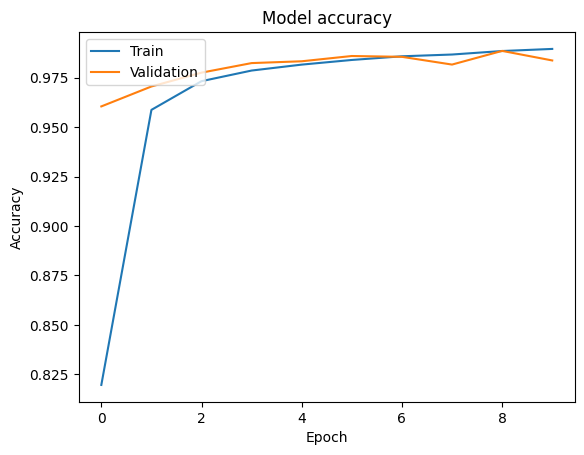

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



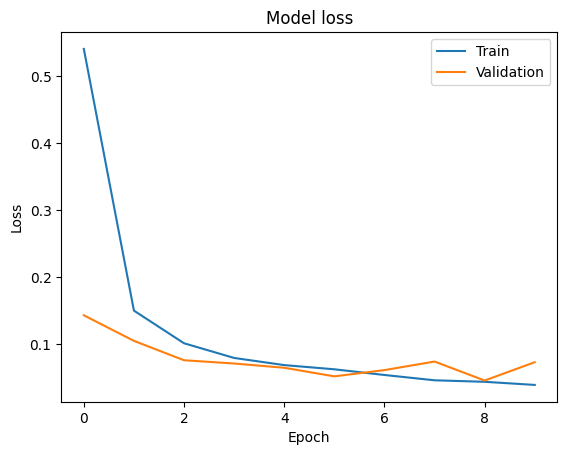

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()